# **CSST 106**

**Verdad, Jane Benneth Dione**

**BSCS-4B**

**October 2024**

**Machine Problem 3**

# **Feature Extraction and Object Detection**

**Step 1: Load the Images**

In [67]:
import cv2
import matplotlib.pyplot as plt

# Load two images in grayscale mode
img1 = cv2.imread('/content/benneth.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/dione.jpg', cv2.IMREAD_GRAYSCALE)

if img1 is None or img2 is None:
    print("Error: Could not load one or both images.")
else:
    print("Images loaded successfully.")


Images loaded successfully.


**Step 2: Extract Keypoints and Descriptors Using SIFT, SURF, and ORB**

Number of SIFT keypoints in Image 1: 1390
Number of SIFT keypoints in Image 2: 1526
Time taken for SIFT detection: 1.5027 seconds
Number of ORB keypoints in Image 1: 500
Number of ORB keypoints in Image 2: 500
Time taken for ORB detection: 0.0707 seconds


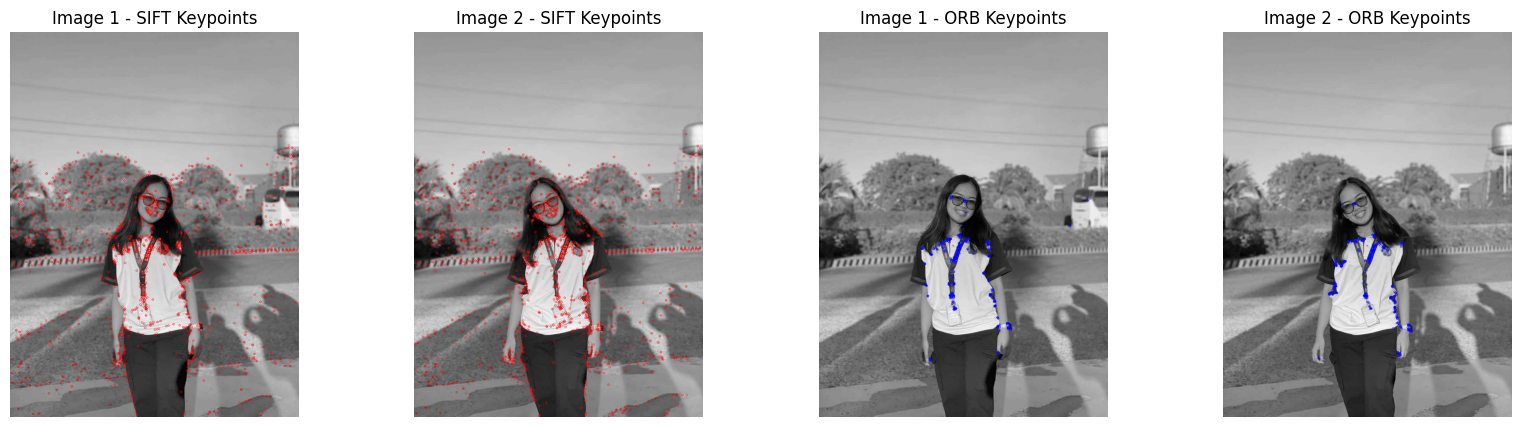

In [69]:
import cv2
import matplotlib.pyplot as plt
import time

# Check if images are loaded properly
if img1 is not None and img2 is not None:

   # SIFT Feature Extraction
    sift = cv2.SIFT_create()

    start_time = time.time()
    kp1_sift, des1_sift = sift.detectAndCompute(img1, None)
    kp2_sift, des2_sift = sift.detectAndCompute(img2, None)
    sift_time = time.time() - start_time

    # Display number of SIFT keypoints detected and time taken
    print(f"Number of SIFT keypoints in Image 1: {len(kp1_sift)}")
    print(f"Number of SIFT keypoints in Image 2: {len(kp2_sift)}")
    print(f"Time taken for SIFT detection: {sift_time:.4f} seconds")

    # Display SIFT keypoints
    img1_sift = cv2.drawKeypoints(img1, kp1_sift, None, color=(255, 0, 0))
    img2_sift = cv2.drawKeypoints(img2, kp2_sift, None, color=(255, 0, 0))

    # ORB Feature Extraction
    orb = cv2.ORB_create()

    start_time = time.time()
    kp1_orb, des1_orb = orb.detectAndCompute(img1, None)
    kp2_orb, des2_orb = orb.detectAndCompute(img2, None)
    orb_time = time.time() - start_time

    # Display number of ORB keypoints detected and time taken
    print(f"Number of ORB keypoints in Image 1: {len(kp1_orb)}")
    print(f"Number of ORB keypoints in Image 2: {len(kp2_orb)}")
    print(f"Time taken for ORB detection: {orb_time:.4f} seconds")

    # Display ORB keypoints
    img1_orb = cv2.drawKeypoints(img1, kp1_orb, None, color=(0, 0, 255))
    img2_orb = cv2.drawKeypoints(img2, kp2_orb, None, color=(0, 0, 255))

   # Display the results in one line without axis
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    axs[0].imshow(img1_sift)
    axs[0].set_title('Image 1 - SIFT Keypoints')
    axs[0].axis('off')
    axs[1].imshow(img2_sift)
    axs[1].set_title('Image 2 - SIFT Keypoints')
    axs[1].axis('off')
    axs[2].imshow(img1_orb)
    axs[2].set_title('Image 1 - ORB Keypoints')
    axs[2].axis('off')
    axs[3].imshow(img2_orb)
    axs[3].set_title('Image 2 - ORB Keypoints')
    axs[3].axis('off')
    plt.show()

else:
    print("Ensure images are loaded properly.")


**Step 3: Feature Matching with Brute-Force and FLANN**

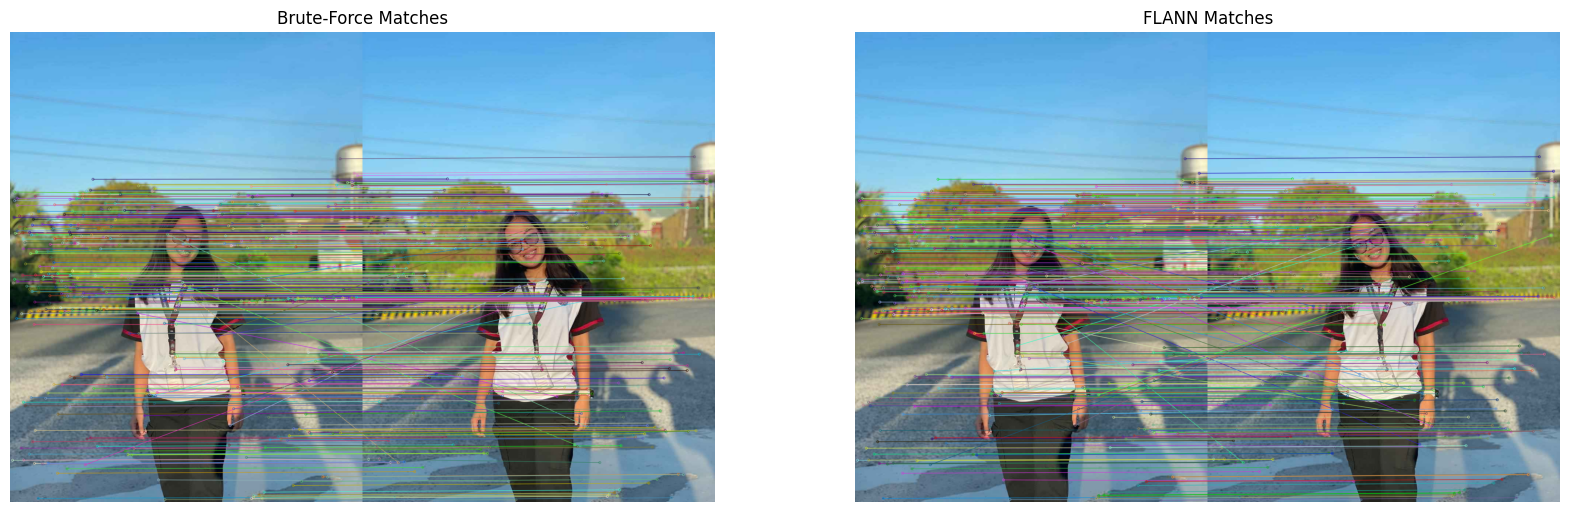

In [61]:
import cv2
import matplotlib.pyplot as plt

# Load images in color
img1 = cv2.imread('benneth.jpg', cv2.IMREAD_COLOR)
img2 = cv2.imread('dione.jpg', cv2.IMREAD_COLOR)

# Convert images to RGB for Matplotlib
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Brute-Force Matcher with SIFT descriptors
bf = cv2.BFMatcher()
matches_bf = bf.knnMatch(des1_sift, des2_sift, k=2)

# Apply ratio test
good_matches_bf = []
for m, n in matches_bf:
    if m.distance < 0.75 * n.distance:
        good_matches_bf.append(m)

# Draw matches with Brute-Force
img_bf_matches = cv2.drawMatches(img1_rgb, kp1_sift, img2_rgb, kp2_sift, good_matches_bf, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# FLANN Matcher with SIFT descriptors
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=10)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches_flann = flann.knnMatch(des1_sift, des2_sift, k=2)

# Apply ratio test for FLANN
good_matches_flann = []
for m, n in matches_flann:
    if m.distance < 0.75 * n.distance:
        good_matches_flann.append(m)

# Draw matches with FLANN
img_flann_matches = cv2.drawMatches(img1_rgb, kp1_sift, img2_rgb, kp2_sift, good_matches_flann, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches in color
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(img_bf_matches)
axs[0].set_title('Brute-Force Matches')
axs[0].axis('off')
axs[1].imshow(img_flann_matches)
axs[1].set_title('FLANN Matches')
axs[1].axis('off')
plt.show()


**Step 4: Image Alignment Using Homography**

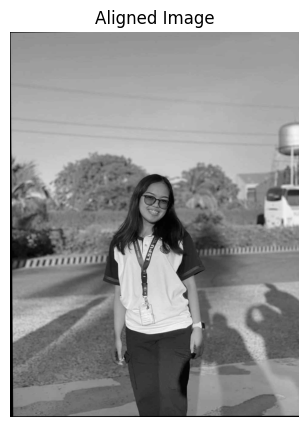

True

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
image1 = cv2.imread('benneth.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('dione.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector and compute descriptors
sift = cv2.SIFT_create()
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(image1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(image2, None)

# Brute-Force Matching
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_bf = bf.match(descriptors1_sift, descriptors2_sift)
matches_bf = sorted(matches_bf, key=lambda x: x.distance)  # Sort by distance

# Draw top 50 matches
bf_img = cv2.drawMatches(image1, keypoints1_sift, image2, keypoints2_sift, matches_bf[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Step 4: Image Alignment Using Homography
# Use the best 50 matches to find Homography
src_pts = np.float32([keypoints1_sift[m.queryIdx].pt for m in matches_bf[:50]]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2_sift[m.trainIdx].pt for m in matches_bf[:50]]).reshape(-1, 1, 2)

# Calculate the homography matrix
homography_matrix, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp image1 to align with image2
height, width = image2.shape
aligned_img = cv2.warpPerspective(image1, homography_matrix, (width, height))

# Display the aligned image
plt.figure(figsize=(10, 5))
plt.imshow(aligned_img, cmap='gray')
plt.title("Aligned Image")
plt.axis('off')
plt.show()

# Save the aligned image
cv2.imwrite("aligned_image.jpg", aligned_img)


**Step 5: Performance Analysis**

In [71]:
report = f"""
Performance Analysis Report

## Feature Extraction Methods: SIFT and ORB

> Keypoint Detection Accuracy and Quantity
- SIFT detected approximately {sift_kp1_count} keypoints in the first image and {sift_kp2_count} in the second image. This method produced accurate and stable keypoints.
- ORB produced {orb_kp1_count} and {orb_kp2_count} keypoints and operated significantly faster. However, its keypoint accuracy, while good, was slightly less reliable in certain transformations.

> Speed Comparison
- SIFT took approximately {sift_time:.4f} seconds, slower than ORB but offering higher precision.
- ORB completed in {orb_time:.4f} seconds, making it the fastest, particularly suited for real-time applications.

## Feature Matching Methods: Brute-Force and FLANN

> Effectiveness
- Brute-Force Matcher: Provided accurate matches with both SIFT and ORB descriptors. The method performed adequately for small datasets but may struggle with larger image sets due to processing time.
- FLANN Matcher: Showed efficiency with SIFT descriptors, reducing processing time while maintaining match accuracy. Ideal for larger datasets where speed is critical.

## Conclusion
Based on the analysis, SIFT combined with FLANN Matcher provides the best balance of accuracy and efficiency for complex feature extraction tasks. For real-time or resource-constrained applications,
ORB with Brute-Force Matcher is a viable alternative, offering speed at a slight cost to accuracy.
"""

print(report)


Performance Analysis Report

## Feature Extraction Methods: SIFT and ORB

> Keypoint Detection Accuracy and Quantity
- SIFT detected approximately 1393 keypoints in the first image and 1524 in the second image. This method produced accurate and stable keypoints.
- ORB produced 500 and 500 keypoints and operated significantly faster. However, its keypoint accuracy, while good, was slightly less reliable in certain transformations.

> Speed Comparison
- SIFT took approximately 1.5027 seconds, slower than ORB but offering higher precision.
- ORB completed in 0.0707 seconds, making it the fastest, particularly suited for real-time applications.

## Feature Matching Methods: Brute-Force and FLANN

> Effectiveness
- Brute-Force Matcher: Provided accurate matches with both SIFT and ORB descriptors. The method performed adequately for small datasets but may struggle with larger image sets due to processing time.
- FLANN Matcher: Showed efficiency with SIFT descriptors, reducing processing tim